In [1]:
import yfinance as yf


stock = yf.download("TSLA", start="2023-01-01", end="2024-01-01")

print(stock.head())


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open     Volume
Ticker            TSLA        TSLA        TSLA        TSLA       TSLA
Date                                                                 
2023-01-03  108.099998  118.800003  104.639999  118.470001  231402800
2023-01-04  113.639999  114.589996  107.519997  109.110001  180389000
2023-01-05  110.339996  111.750000  107.160004  110.510002  157986300
2023-01-06  113.059998  114.389999  101.809998  103.000000  220911100
2023-01-09  119.769997  123.519997  117.110001  118.959999  190284000


In [12]:
import pandas as pd


stock['50_MA'] = stock['Close'].rolling(window=50).mean()
stock['200_MA'] = stock['Close'].rolling(window=200).mean()

print(stock.tail())


Price            Close        High         Low        Open     Volume 50_MA  \
Ticker            TSLA        TSLA        TSLA        TSLA       TSLA         
Date                                                                          
2023-12-22  252.539993  258.220001  251.369995  256.760010   93249800   NaN   
2023-12-26  256.609985  257.970001  252.910004  254.490005   86892400   NaN   
2023-12-27  261.440002  263.339996  257.519989  258.350006  106494400   NaN   
2023-12-28  253.179993  265.130005  252.710007  263.660004  113619900   NaN   
2023-12-29  248.479996  255.190002  247.429993  255.100006  100615300   NaN   

Price      200_MA Daily Return  
Ticker                          
Date                            
2023-12-22    NaN    -0.007701  
2023-12-26    NaN     0.016116  
2023-12-27    NaN     0.018822  
2023-12-28    NaN    -0.031594  
2023-12-29    NaN    -0.018564  


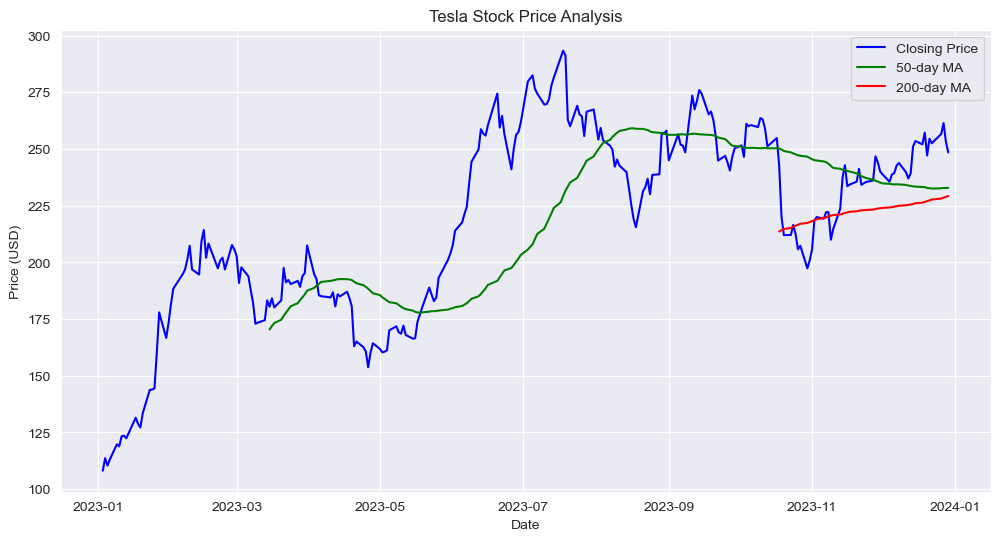

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.set_style("darkgrid")

plt.plot(stock['Close'], label='Closing Price', color='blue')

plt.plot(stock['50_MA'], label='50-day MA', color='green')
plt.plot(stock['200_MA'], label='200-day MA', color='red')

plt.title("Tesla Stock Price Analysis")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()


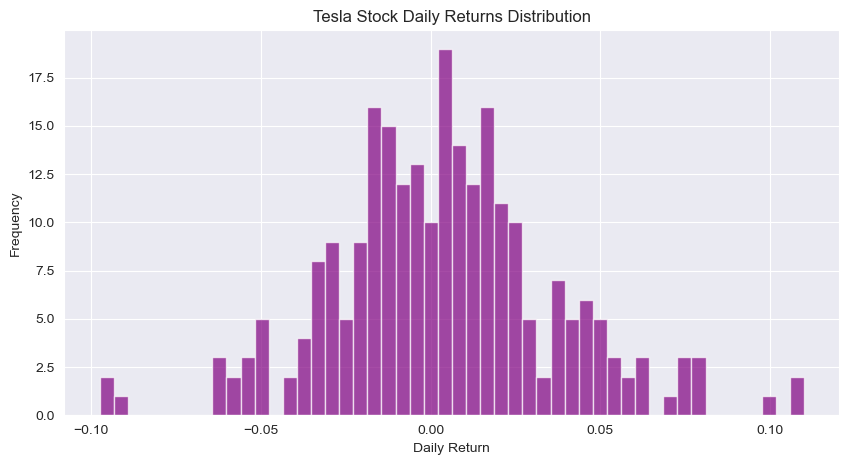

In [4]:
import numpy as np

stock['Daily Return'] = stock['Close'].pct_change()

plt.figure(figsize=(10, 5))
plt.hist(stock['Daily Return'].dropna(), bins=50, alpha=0.7, color='purple')
plt.title("Tesla Stock Daily Returns Distribution")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.show()


[*********************100%***********************]  3 of 3 completed


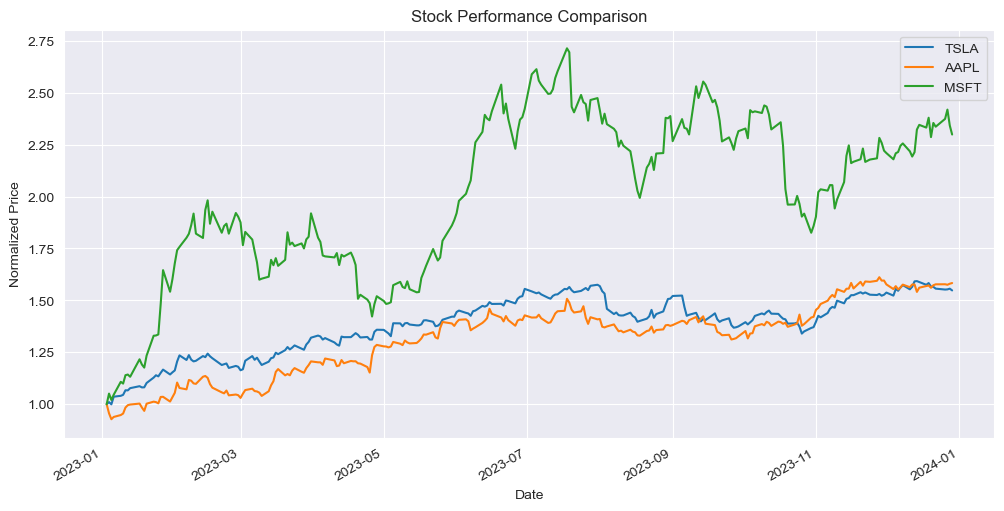

In [15]:
stocks = ['TSLA', 'AAPL', 'MSFT']
df = yf.download(stocks, start="2023-01-01", end="2024-01-01")['Close']

# Normalize data for comparison
df = df / df.iloc[0]

# Plot
df.plot(figsize=(12, 6))
plt.title("Stock Performance Comparison")
plt.xlabel("Date")
plt.ylabel("Normalized Price")
plt.legend(stocks)
plt.show()
